In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
df = pd.read_csv(r"C:\Users\hemav\OneDrive\Desktop\python\spam.csv", encoding='ISO-8859-1')


In [15]:
df

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN
...,...,...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,NaN,NaN,NaN
5568,ham,Will Ì_ b going to esplanade fr home?,NaN,NaN,NaN
5569,ham,"Pity, * was in mood for that. So...any other s...",NaN,NaN,NaN
5570,ham,The guy did some bitching but I acted like i'd...,NaN,NaN,NaN


In [16]:
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [19]:
df.describe()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
count,5572,5572,50,12,6
unique,2,5169,43,10,5
top,ham,"Sorry, I'll call later","bt not his girlfrnd... G o o d n i g h t . . .@""","MK17 92H. 450Ppw 16""","GNT:-)"""
freq,4825,30,3,2,2


In [20]:
df.columns

Index(['v1', 'v2', 'Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], dtype='object')

In [21]:
list(set(df))

['Unnamed: 2', 'Unnamed: 4', 'v1', 'Unnamed: 3', 'v2']

In [22]:
df.isnull()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,False,False,True,True,True
1,False,False,True,True,True
2,False,False,True,True,True
3,False,False,True,True,True
4,False,False,True,True,True
...,...,...,...,...,...
5567,False,False,True,True,True
5568,False,False,True,True,True
5569,False,False,True,True,True
5570,False,False,True,True,True


In [23]:
df.isnull().sum()

v1               0
v2               0
Unnamed: 2    5522
Unnamed: 3    5560
Unnamed: 4    5566
dtype: int64

In [25]:
df.shape

(5572, 5)

In [26]:
str(df)

"        v1                                                 v2 Unnamed: 2  \\\n0      ham  Go until jurong point, crazy.. Available only ...        NaN   \n1      ham                      Ok lar... Joking wif u oni...        NaN   \n2     spam  Free entry in 2 a wkly comp to win FA Cup fina...        NaN   \n3      ham  U dun say so early hor... U c already then say...        NaN   \n4      ham  Nah I don't think he goes to usf, he lives aro...        NaN   \n...    ...                                                ...        ...   \n5567  spam  This is the 2nd time we have tried 2 contact u...        NaN   \n5568   ham              Will Ì_ b going to esplanade fr home?        NaN   \n5569   ham  Pity, * was in mood for that. So...any other s...        NaN   \n5570   ham  The guy did some bitching but I acted like i'd...        NaN   \n5571   ham                         Rofl. Its true to its name        NaN   \n\n     Unnamed: 3 Unnamed: 4  \n0           NaN        NaN  \n1           

In [30]:
print(df.columns)



Index(['v1', 'v2', 'Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], dtype='object')


In [31]:
df.rename(columns={'v1': 'label', 'v2': 'message'}, inplace=True)


In [32]:
df['label_num'] = df['label'].map({'ham': 0, 'spam': 1})


In [33]:
df.head()

,label,message,Unnamed: 2,Unnamed: 3,Unnamed: 4,label_num
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN,0
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN,0
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN,1
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN,0
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN,0


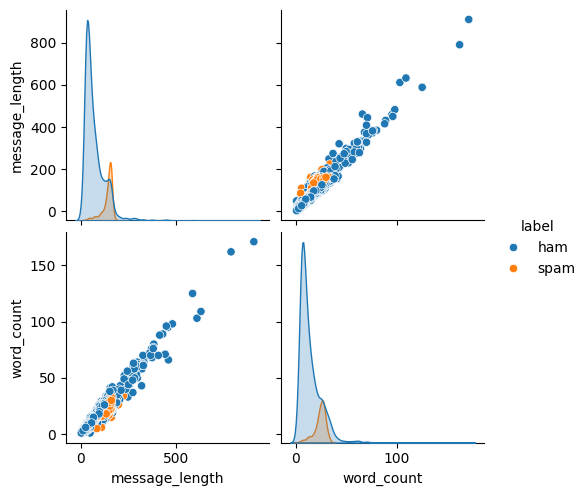

In [ ]:
df = pd.read_csv(r"C:\Users\hemav\OneDrive\Desktop\python\spam.csv", encoding='ISO-8859-1')
df = df[['v1', 'v2']]
df.columns = ['label', 'message']
df['message_length'] = df['message'].apply(len)
df['word_count'] = df['message'].apply(lambda x: len(x.split()))
sns.pairplot(df[['message_length', 'word_count', 'label']], hue='label')
plt.show()

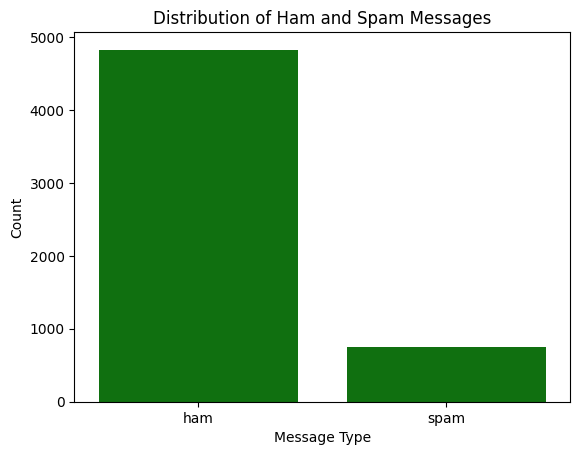

In [50]:
sns.countplot(data=df, x='label',color='green')
plt.title('Distribution of Ham and Spam Messages')
plt.xlabel('Message Type')
plt.ylabel('Count')
plt.show()

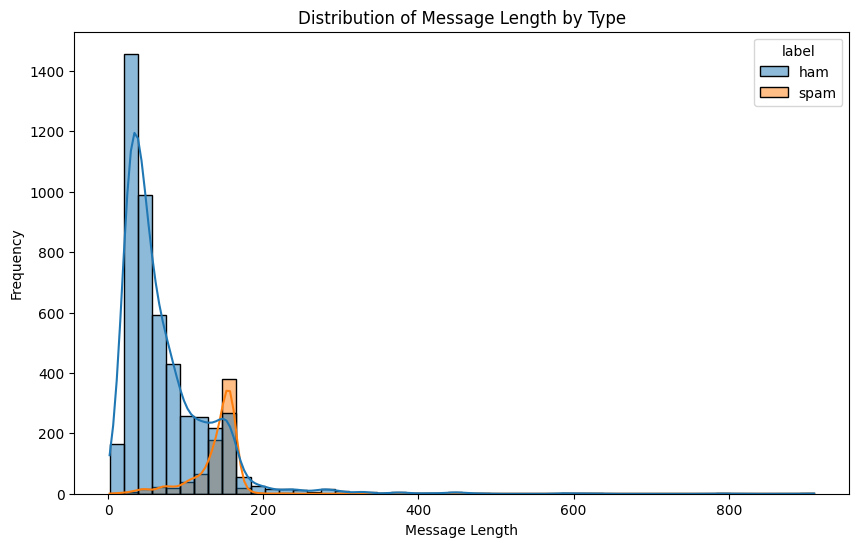

In [51]:
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='message_length', hue='label', bins=50, kde=True)
plt.title('Distribution of Message Length by Type')
plt.xlabel('Message Length')
plt.ylabel('Frequency')
plt.show()

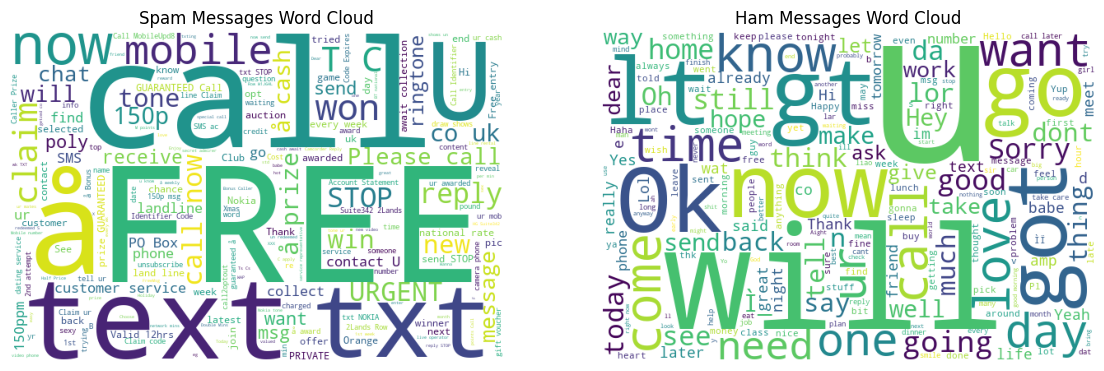

In [52]:
spam_words = ' '.join(df[df['label'] == 'spam']['message'])
ham_words = ' '.join(df[df['label'] == 'ham']['message'])
plt.figure(figsize=(14, 6))
plt.subplot(1, 2, 1)
plt.imshow(WordCloud(width=600, height=400, background_color='white').generate(spam_words))
plt.title('Spam Messages Word Cloud')
plt.axis('off')
plt.subplot(1, 2, 2)
plt.imshow(WordCloud(width=600, height=400, background_color='white').generate(ham_words))
plt.title('Ham Messages Word Cloud')
plt.axis('off')
plt.show()

In [55]:

df = pd.read_csv(r"C:\Users\hemav\OneDrive\Desktop\python\spam.csv", encoding='ISO-8859-1')
df = df[['v1', 'v2']]  # ✅ Only needed if you haven't already renamed
df.columns = ['label', 'message']
df['label_num'] = df['label'].map({'ham': 0, 'spam': 1})
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(df['message'], df['label_num'], test_size=0.2, random_state=42)


In [56]:
vectorizer = CountVectorizer()
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)

In [57]:
model = MultinomialNB()
model.fit(X_train_vec, y_train)

MultinomialNB()

In [58]:
y_pred = model.predict(X_test_vec)

In [59]:
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.9838565022421525
Classification Report:
               precision    recall  f1-score   support

           0       0.98      1.00      0.99       965
           1       0.99      0.89      0.94       150

    accuracy                           0.98      1115
   macro avg       0.98      0.95      0.96      1115
weighted avg       0.98      0.98      0.98      1115



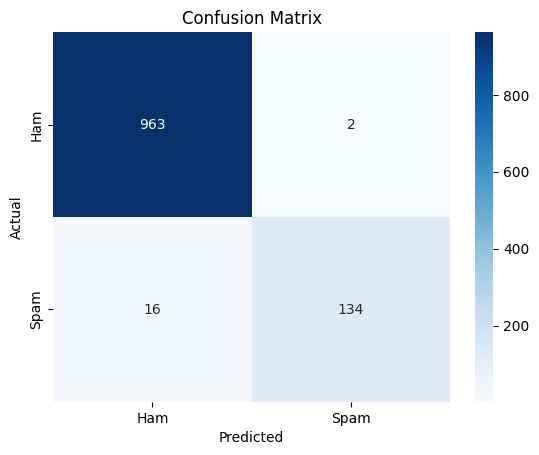

In [60]:

cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',xticklabels=['Ham', 'Spam'], yticklabels=['Ham', 'Spam'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [61]:

def predict_message(msg):
    vec = vectorizer.transform([msg])
    prediction = model.predict(vec)[0]
    return "Spam" if prediction else "Not Spam"
print(predict_message("Congratulations! You've won a $1000 gift card. Click here to claim."))
print(predict_message("Hi, are we still meeting for lunch today?"))

Spam
Not Spam
